# N-gram
<img src="https://cdn.botpenguin.com/assets/website/N_Gram_feb7947286.png">

- 토큰들을 하나의 단어 모음 벡터로 표현하면 단어들의 순서에 담긴 정보가 사라짐
- 하지만 인접 단어들을 묶으면 단어의 `문맥(Context)`이 어느 정도 형성
- 하지만 n-gram은 문서에서 전반적으로 희소하게 나타나며 자주 발견되는 n-gram들은 불용어에 가까운 경우가 많다.


## 1.N-gram 실습

In [2]:
from nltk import ngrams 

# 영어 텍스트 
english_text = "I love deep learning"
english_tokens = english_text.split()
print(english_tokens)

# 한국어 텍스트 
korean_text = "나는 딥러닝을 좋아해"
korean_tokens = korean_text.split()
print(korean_tokens)

['I', 'love', 'deep', 'learning']
['나는', '딥러닝을', '좋아해']


In [4]:
list(ngrams(english_tokens, 2))

[('I', 'love'), ('love', 'deep'), ('deep', 'learning')]

In [5]:
list(ngrams(english_tokens, 3))

[('I', 'love', 'deep'), ('love', 'deep', 'learning')]

In [6]:
list(ngrams(korean_tokens, 3))

[('나는', '딥러닝을', '좋아해')]

In [7]:
def generate_ngrams(tokens, n):
    return list(ngrams(tokens, n))

In [9]:
for n in range(1, 4):
    print(f'영어 {n}-gram: {generate_ngrams(english_tokens, n)}')
    print(f'한국어 {n}-gram: {generate_ngrams(korean_tokens, n)}\n')

영어 1-gram: [('I',), ('love',), ('deep',), ('learning',)]
한국어 1-gram: [('나는',), ('딥러닝을',), ('좋아해',)]

영어 2-gram: [('I', 'love'), ('love', 'deep'), ('deep', 'learning')]
한국어 2-gram: [('나는', '딥러닝을'), ('딥러닝을', '좋아해')]

영어 3-gram: [('I', 'love', 'deep'), ('love', 'deep', 'learning')]
한국어 3-gram: [('나는', '딥러닝을', '좋아해')]



# 2.N-gram 빈도수 확인

## 1.데이터 로드
  - nltk.download('gutenberg'): Gutenberg 코퍼스(corpus)를 다운로드함. 
    - NLTK의 Gutenberg 코퍼스는 유명한 책들의 텍스트 데이터를 포함하는 데이터셋으로 여기에는 셰익스피어의 작품들, 'Moby Dick', 'Alice in Wonderland'와 같은 다양한 고전 문학 작품들이 포함되어 있음.

In [10]:
import nltk
from nltk.corpus import gutenberg, stopwords
from collections import Counter
from nltk import ngrams
import re
import matplotlib.pyplot as plt

# 'stopwords' 자원 다운로드
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /Users/yoon/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [11]:
# NLTK 코퍼스에서 'Moby Dick' 텍스트 데이터 가져오기
nltk.download('gutenberg')
nltk.download('punkt')

# 'Moby Dick'의 텍스트 데이터 로드
# raw(): 코퍼스에 저장된 텍스트를 구두점, 줄 바꿈, 공백 등 모든 내용을 그대로 포함한 문자열로 반환
text = gutenberg.raw('melville-moby_dick.txt')

print(text)

[Moby Dick by Herman Melville 1851]


ETYMOLOGY.

(Supplied by a Late Consumptive Usher to a Grammar School)

The pale Usher--threadbare in coat, heart, body, and brain; I see him
now.  He was ever dusting his old lexicons and grammars, with a queer
handkerchief, mockingly embellished with all the gay flags of all the
known nations of the world.  He loved to dust his old grammars; it
somehow mildly reminded him of his mortality.

"While you take in hand to school others, and to teach them by what
name a whale-fish is to be called in our tongue leaving out, through
ignorance, the letter H, which almost alone maketh the signification
of the word, you deliver that which is not true." --HACKLUYT

"WHALE. ... Sw. and Dan. HVAL.  This animal is named from roundness
or rolling; for in Dan. HVALT is arched or vaulted." --WEBSTER'S
DICTIONARY

"WHALE. ... It is more immediately from the Dut. and Ger. WALLEN;
A.S. WALW-IAN, to roll, to wallow." --RICHARDSON'S DICTIONARY

KETOS,               GRE

[nltk_data] Downloading package gutenberg to /Users/yoon/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!
[nltk_data] Downloading package punkt to /Users/yoon/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [12]:
# 영어 불용어
len(stopwords.words('english'))

179

## 2.텍스트 전처리
- 대문자->소문자 변환
- 구두점 제거
- 불용어 제거

In [14]:
# 1. 텍스트 전처리 (소문자 변환, 구두점 제거, 불용어 제거)
def preprocess_text(text):
    # 대소문자 정규화 
    text = text.lower()

    # 토큰화 
    tokens = nltk.word_tokenize(text)

    # 구두점 제거 
    # r'\w+' : 단어가 알파벳, 숫자, 밑줄로 시작하면 조건을 만족 (+ : 1개 이상의 연속된 \w문자를 의미)
    tokens = [token for token in tokens if re.match(r'\w+', token)]

    # 불용어 제거 
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]

    return tokens 

In [15]:
# 전처리된 텍스트
processed_text = preprocess_text(text)
print(len(processed_text))
print(processed_text)

108460
['moby', 'dick', 'herman', 'melville', '1851', 'etymology', 'supplied', 'late', 'consumptive', 'usher', 'grammar', 'school', 'pale', 'usher', 'threadbare', 'coat', 'heart', 'body', 'brain', 'see', 'ever', 'dusting', 'old', 'lexicons', 'grammars', 'queer', 'handkerchief', 'mockingly', 'embellished', 'gay', 'flags', 'known', 'nations', 'world', 'loved', 'dust', 'old', 'grammars', 'somehow', 'mildly', 'reminded', 'mortality', 'take', 'hand', 'school', 'others', 'teach', 'name', 'whale-fish', 'called', 'tongue', 'leaving', 'ignorance', 'letter', 'h', 'almost', 'alone', 'maketh', 'signification', 'word', 'deliver', 'true', 'hackluyt', 'whale', 'sw.', 'dan', 'hval', 'animal', 'named', 'roundness', 'rolling', 'dan', 'hvalt', 'arched', 'vaulted', 'webster', 'dictionary', 'whale', 'immediately', 'dut', 'ger', 'wallen', 'a.s.', 'walw-ian', 'roll', 'wallow', 'richardson', 'dictionary', 'ketos', 'greek', 'cetus', 'latin', 'whoel', 'anglo-saxon', 'hvalt', 'danish', 'wal', 'dutch', 'hwal', 's

## 3.N-gram 빈도 계산

In [16]:
# n-gram 빈도 계산 함수
def calculate_ngram_frequencies(tokens, n):
    n_grams = list(ngrams(tokens, n))
    return Counter(n_grams)

In [18]:
# 3. 2-gram, 3-gram, 4-gram 빈도 계산
bigrams = calculate_ngram_frequencies(processed_text, 2)
trigrams = calculate_ngram_frequencies(processed_text, 3)
fourgrams = calculate_ngram_frequencies(processed_text, 4)
fivegrams = calculate_ngram_frequencies(processed_text, 5)

# 상위 10개의 빈도가 높은 n-gram 출력
print("Top 10 2-grams:", bigrams.most_common(10))
print("Top 10 3-grams:", trigrams.most_common(10))
print("Top 10 4-grams:", fourgrams.most_common(10))
print("Top 10 5-grams:", fivegrams.most_common(10))

Top 10 2-grams: [(('sperm', 'whale'), 177), (('white', 'whale'), 106), (('moby', 'dick'), 82), (('old', 'man'), 81), (('captain', 'ahab'), 64), (('right', 'whale'), 52), (('cried', 'ahab'), 33), (('wo', "n't"), 32), (('captain', 'peleg'), 32), (('aye', 'aye'), 30)]
Top 10 3-grams: [(('sperm', 'whale', 'head'), 12), (('great', 'sperm', 'whale'), 11), (('every', 'one', 'knows'), 9), (('seen', 'white', 'whale'), 8), (('book', 'ii', 'octavo'), 7), (('right', 'whale', 'head'), 6), (('seven', 'hundred', 'seventy-seventh'), 6), (('book', 'folio', 'chapter'), 6), (('cape', 'good', 'hope'), 6), (('greenland', 'right', 'whale'), 5)]
Top 10 4-grams: [(('book', 'ii', 'octavo', 'chapter'), 5), (('hast', 'seen', 'white', 'whale'), 5), (('morning', 'ye', 'shipmates', 'morning'), 3), (('book', 'iii', 'duodecimo', 'chapter'), 3), (('three', 'four', 'years', 'voyage'), 3), (('moby', 'dick', 'moby', 'dick'), 3), (('white', 'whale', 'white', 'whale'), 3), (('sperm', 'whale', 'sperm', 'whale'), 3), (('sper

## 4.시각화
  - 중요한 주제 및 캐릭터: 'Moby Dick'에서 가장 자주 언급되는 것은 고래와 관련된 표현들, 특히 'sperm whale', 'white whale' 등임. 이는 이야기의 핵심 주제가 고래와 그와 관련된 모험임을 보여줌.
  - 구체적 묘사와 반복 표현: 3-gram과 4-gram에서는 고래와 관련된 구체적인 묘사와 책의 특정 부분을 강조하는 표현이 나타남. 5-gram은 의미없는 표현들이 나탐


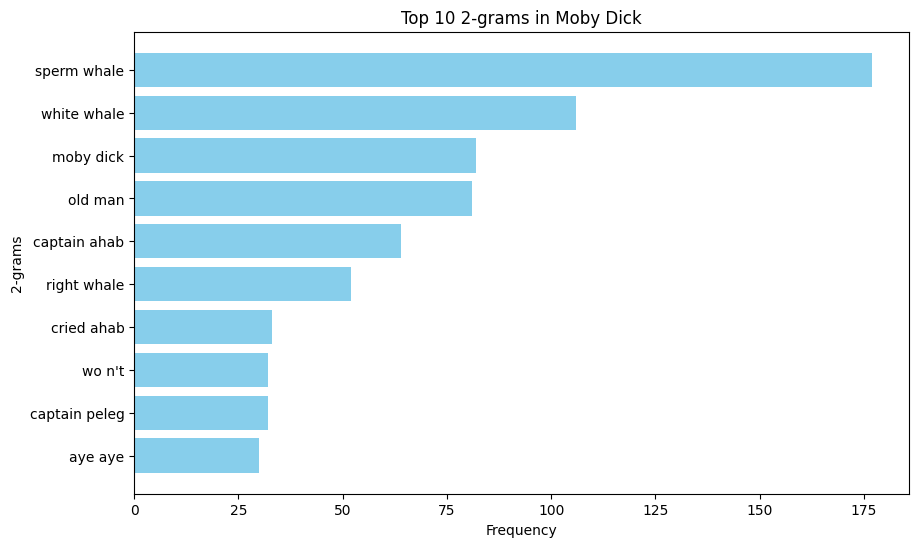

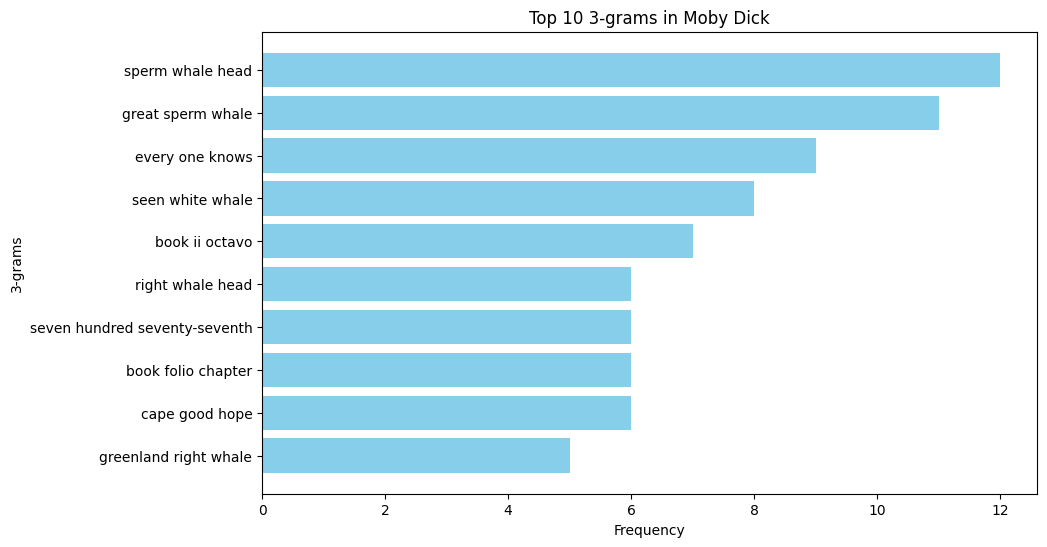

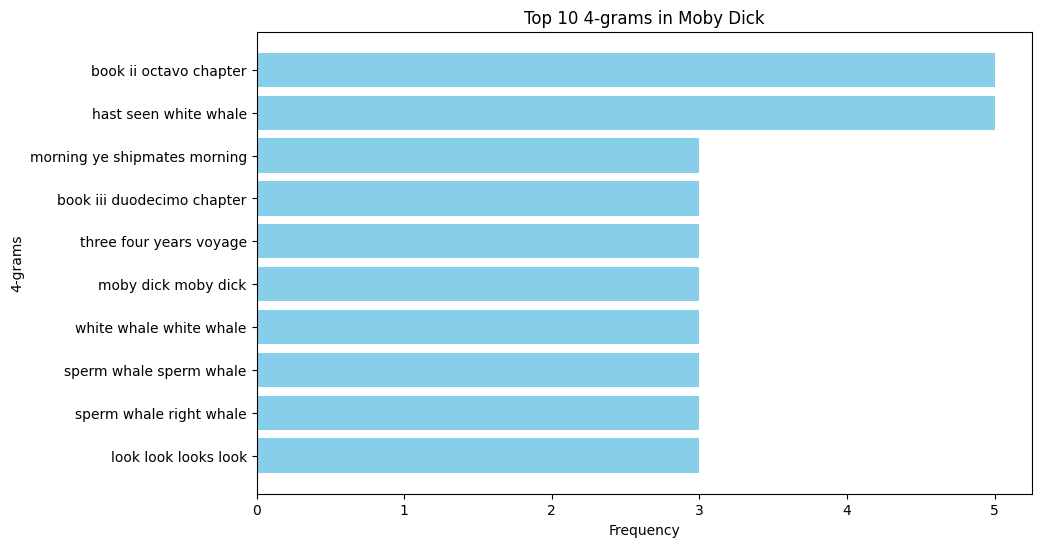

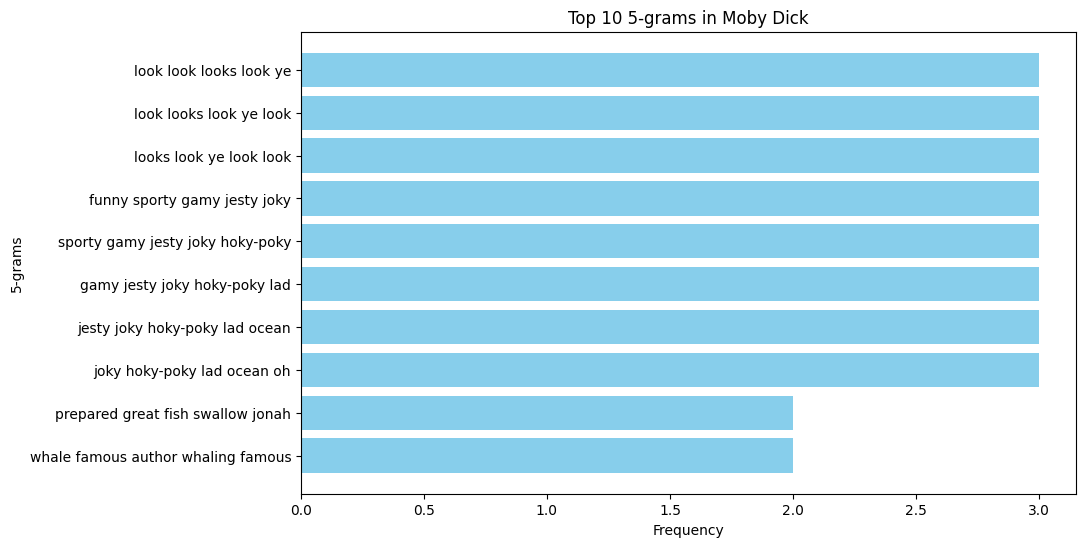

In [19]:
# 4. n-gram 시각화 함수
def plot_ngram_frequencies(ngram_counter, n, title):
    ngrams, counts = zip(*ngram_counter.most_common(10)) # *는 언패킹할 때 사용 (most_common의 반환값인 list를 unpacking해줌)
    ngrams = [' '.join(gram) for gram in ngrams]

    plt.figure(figsize=(10, 6))
    plt.barh(ngrams, counts, color='skyblue')
    plt.xlabel('Frequency')
    plt.ylabel(f'{n}-grams')
    plt.title(f'Top 10 {title}')
    plt.gca().invert_yaxis()
    plt.show()

# 5. 2-gram, 3-gram, 4-gram 시각화
plot_ngram_frequencies(bigrams, 2, '2-grams in Moby Dick')
plot_ngram_frequencies(trigrams, 3, '3-grams in Moby Dick')
plot_ngram_frequencies(fourgrams, 4, '4-grams in Moby Dick')
plot_ngram_frequencies(fivegrams, 5, '5-grams in Moby Dick')